<a href="https://colab.research.google.com/github/lasnabunan/Epileptic-Classification/blob/master/Seizures_Level2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL REQUIREMENTS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls /content/drive/My\ Drive/Seizure/Dataset/EEG\ Signals
%cd /content/drive/My\ Drive/Seizure/Dataset/EEG\ Signals

fig1.png  fig2.png  Non-Seizure  ns.png  pyeeg	Seizure
/content/drive/My Drive/Seizure/Dataset/EEG Signals


In [3]:
%cd pyeeg
!ls
!python setup.py install
%cd /content/drive/My\ Drive/Seizure/Dataset/EEG\ Signals

/content/drive/My Drive/Seizure/Dataset/EEG Signals/pyeeg
build  fig2.png     pyeeg	    README.md  setup.py
dist   LICENSE.txt  pyeeg.egg-info  setup.cfg  tests
running install
running bdist_egg
running egg_info
writing pyeeg.egg-info/PKG-INFO
writing dependency_links to pyeeg.egg-info/dependency_links.txt
writing requirements to pyeeg.egg-info/requires.txt
writing top-level names to pyeeg.egg-info/top_level.txt
writing manifest file 'pyeeg.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/hjorth_mobility_complexity.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/__init__.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/fisher_info.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/largest_lyauponov_exponent.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg

In [4]:
pip install pyrenn

#IMPORT LIBRARIES

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import warnings
import pywt
import tensorflow as tf
import pyeeg
import pyrenn as prn
%matplotlib inline
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

#LOAD FILES FROM FOLDERS

In [0]:
# import each and every file

dirA="./Non-Seizure/Set A/"
tempA = []
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempB = sorted(tempA)          # class: 0     val:  -1

dirB="./Non-Seizure/Set B/"
tempB = []
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)          # class: 0     val:  -1

dirC="./Non-Seizure/Set C/"
tempC = []
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)          # class:0       val: -1
    
dirD="./Non-Seizure/Set D/"
tempD = []
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)          # class: 0        val: -1


dirE="./Seizure/Set E/"
tempE = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)          # class: 1     val:  0

## CREATE SMALL TABLES

In [0]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_csv(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_csv(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_csv(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_csv(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_csv(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

##CREATE BIG TABLES

In [0]:
def table(table):
    big_table = None
    for tf in table:
        big_table = pd.concat([big_table, tf],axis=1)
    return big_table

In [0]:
bigA = table(ta)
bigB = table(tb)
bigC = table(tc)
bigD = table(td)
bigE = table(te)

head = list(bigB.columns.values)

In [10]:
print(len(bigB.axes[0]))
print(len(bigB.axes[1]))

4097
100


In [11]:
bigB.head(10)

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,...,A60,A61,A62,A63,A64,A65,A66,A67,A68,A69,A70,A71,A72,A73,A74,A75,A76,A77,A78,A79,A80,A81,A82,A83,A84,A85,A86,A87,A88,A89,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-24,-55,-36,-14,-58,87,-52,2,8,-53,-159,18,-69,29,142,41,-43,71,14,-27,-35,15,5,-134,7,-84,-49,58,-8,-35,-21,-33,-77,-106,72,-12,127,-54,-161,15,...,-28,-166,75,-156,86,31,76,-136,-38,13,-14,-53,-38,-53,89,-42,43,23,19,51,96,92,-17,-9,-34,-40,-47,-95,-16,-51,62,-128,-83,98,-53,29,-76,27,-6,-18
1,-22,-48,-40,-5,-78,98,-56,-6,0,-15,-176,14,-80,20,142,31,-30,82,3,-14,-27,12,-30,-116,17,-62,-28,67,-13,-37,-28,-44,-75,-114,102,-8,160,-74,-224,-6,...,4,-175,44,-168,74,40,57,-121,-36,-14,-8,7,-18,-54,57,-54,86,20,6,84,99,110,31,-10,-39,-19,-99,-124,-26,-33,49,-158,-120,178,-33,10,-102,4,-19,-13
2,-17,-48,-36,0,-83,103,-49,-22,-16,11,-174,13,-81,-8,138,28,-4,62,-14,-4,-14,0,-56,-87,4,-42,0,79,-24,-32,-37,-45,-52,-114,111,-12,166,-89,-239,-28,...,21,-138,0,-187,68,41,7,-84,-76,-50,-9,55,-18,-38,22,-53,138,-5,5,105,77,103,35,7,-49,-38,-103,-143,-17,-6,14,-161,-123,236,-23,-26,-95,1,-47,0
3,-18,-38,-35,7,-69,108,-51,-17,-38,38,-145,9,-77,-39,143,42,29,23,-27,7,-2,-17,-81,-73,-17,-28,29,98,-44,-21,-41,-36,-43,-123,121,-14,149,-106,-209,-37,...,39,-88,-60,-160,54,77,-65,-50,-117,-70,-5,80,-22,-19,18,-52,131,-37,21,72,77,64,-2,-9,-55,-71,-58,-127,23,6,-14,-158,-119,237,0,-81,-65,19,-83,9
4,-19,-23,-22,7,-31,97,-53,6,-31,35,-101,-6,-59,-74,130,61,41,-24,-45,21,-13,-28,-86,-78,-35,-12,41,101,-56,-13,-51,-31,-36,-113,137,-2,120,-111,-154,-35,...,71,-61,-107,-108,-3,92,-103,-9,-135,-108,11,76,-10,-30,23,-53,97,-49,37,-21,75,47,-39,-38,-42,-76,-21,-72,52,36,-14,-152,-93,187,10,-127,-30,43,-99,6
5,-14,0,-15,-4,-4,86,-71,26,-19,48,-45,-20,-31,-97,93,77,38,-46,-69,24,-24,-31,-80,-93,-41,6,39,112,-58,-9,-62,-31,-40,-84,152,1,86,-104,-90,-26,...,73,-48,-106,-62,-71,43,-111,17,-144,-158,19,123,-9,-35,32,-69,53,-62,49,-101,71,59,-67,-50,-31,-86,-4,-12,30,63,-11,-144,-45,94,26,-148,2,57,-104,-20
6,-4,11,-4,-18,10,71,-96,40,12,65,0,-31,-7,-103,36,90,36,-33,-86,18,-23,-39,-65,-122,-46,13,27,94,-54,-8,-65,-31,-46,-47,135,10,42,-88,-9,-24,...,48,-55,-104,-10,-76,-24,-138,46,-142,-177,10,109,-22,-38,62,-115,-4,-75,74,-134,67,47,-107,-53,-36,-79,18,29,-5,71,-2,-117,17,-13,37,-140,25,54,-81,-67
7,-1,22,13,-15,9,76,-119,42,37,72,29,-27,19,-95,-27,105,27,-14,-85,13,-23,-51,-49,-139,-45,11,12,72,-43,2,-63,-48,-48,-34,83,1,-14,-64,62,-24,...,16,-68,-45,32,-126,-56,-120,51,-118,-177,6,82,-1,-52,76,-142,-89,-52,74,-146,72,27,-122,-68,-41,-60,-5,74,-24,68,-16,-65,77,-114,28,-104,40,40,-46,-126
8,7,21,33,-6,1,96,-110,35,43,44,15,-10,19,-68,-72,94,13,1,-79,13,-25,-44,-26,-141,-35,13,-11,54,-24,4,-50,-51,-26,-21,20,-14,-63,-59,105,-15,...,-28,-63,32,67,-82,-37,-89,52,-33,-168,9,89,-2,-74,73,-166,-121,20,40,-119,75,34,-127,-48,-20,-89,-16,100,-33,45,-34,-5,103,-185,15,-78,33,19,-1,-162
9,17,3,38,4,-10,100,-90,19,48,-2,15,5,0,-41,-83,77,15,1,-65,2,-32,-35,4,-120,-35,4,-40,45,-16,20,-19,-38,-5,-21,-42,-21,-107,-48,122,-11,...,-62,-70,92,75,-44,-7,-68,30,31,-130,6,83,-17,-61,67,-199,-136,11,33,-77,61,55,-136,-1,-3,-104,-37,119,-19,-4,-57,61,120,-219,1,-78,14,25,30,-165


##CREATE SUB-MATRIX FOR EACH

In [0]:
# creat a matrix
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx
# every mat contain probs mat[:,i] total 28 start form mat1

In [0]:
matA = creat_mat(bigA)
matB = creat_mat(bigB) # : refers to NON-SEIZURE
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE) # :  refers to SEIZURES

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB) # matB[:,0] --- > channel 0, matB[:,1] --- > channel 1 like that
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

# 4097 data point per channel 
# 173.61 Hz sample rate and there are 4097 data point for each channel
# total 100 channel are their
# 4097/173.61 = 23.59 sec 
# the raw data from one of the channels for the 23.59 sec

In [14]:
matB.shape

(4097, 100)

In [15]:
matNS = np.concatenate((matA, matB, matC, matD), axis= 1)
print(matNS.shape)

(4097, 400)


# VISUALISING THE DATA POINTS

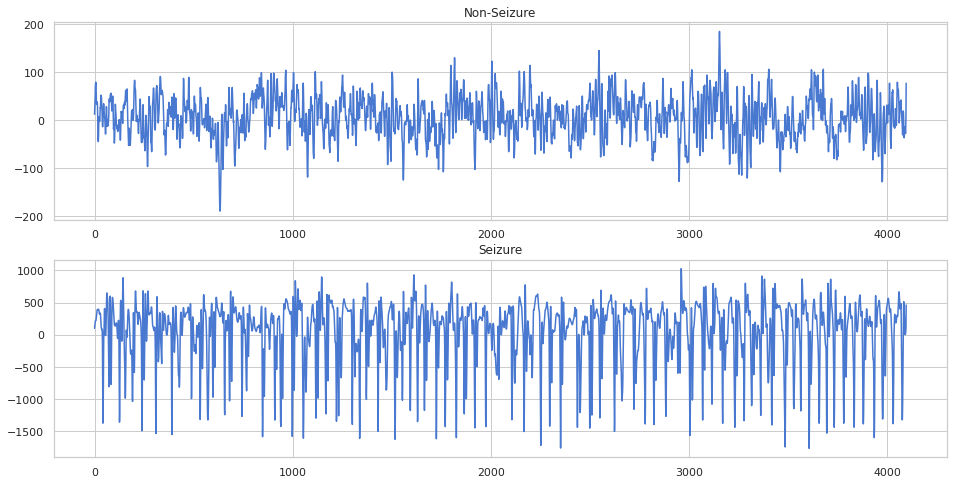

In [87]:
samples = np.arange(0,4097,1)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('Non-Seizure')
plt.plot(samples,matNS[:,0], label = 'Non-Seizure')
plt.subplot(2,1,2)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label= 'Seizure')
plt.savefig('ns.png')
plt.show()

#APPLYING WAVELET TRANFORM

##DECOMPOSITION OF SIGNAL INTO SUB-BANDS

In [17]:
filters = pywt.wavelist('bior')
print(filters)
print(len(filters))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
15


In [0]:
w = pywt.Wavelet('bior1.1')
temp_cA = []
temp_cD2 = []
temp_cD1 = []
for i in matNS.T:
  cA,cD2,cD1 = pywt.wavedec(i, w, mode='constant', level=2)
  temp_cA.append(cA)
  temp_cD1.append(cD1)
  temp_cD2.append(cD2)
coeff_cA = np.array(temp_cA)
coeff_cD1 = np.array(temp_cD1)
coeff_cD2 = np.array(temp_cD2)

In [0]:
w = pywt.Wavelet('bior1.1')
temp_cA_S = []
temp_cD2_S = []
temp_cD1_S = []
for i in matE.T:
  cA_S,cD2_S,cD1_S = pywt.wavedec(i, w, mode='constant', level=2)
  temp_cA_S.append(cA_S)
  temp_cD2_S.append(cD2_S)
  temp_cD1_S.append(cD1_S)
coeff_cA_S = np.array(temp_cA_S)
coeff_cD2_S = np.array(temp_cD2_S)
coeff_cD1_S = np.array(temp_cD1_S)

In [20]:
print(len(coeff_cA_S[0]))
print(coeff_cD2_S.shape)
print(coeff_cD1_S.shape)
print(coeff_cA.shape)
print(coeff_cD2.shape)
print(coeff_cD1.shape)

1025
(100, 1025)
(100, 2049)
(400, 1025)
(400, 1025)
(400, 2049)


In [0]:
coeff_cA_total = np.concatenate([coeff_cA, coeff_cA_S])
coeff_cD1_total = np.concatenate([coeff_cD1, coeff_cD1_S])
coeff_cD2_total = np.concatenate([coeff_cD2, coeff_cD2_S])

##VISUALISING THE SUB-BANDS

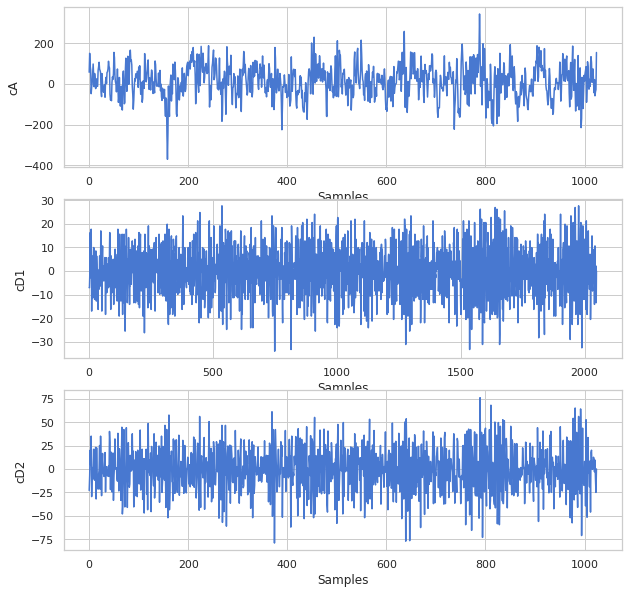

In [85]:
level =2
plt.figure(figsize=(10,10))
plt.subplot(level+1,1,1)
plt.ylabel('cA')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cA[0]),1),coeff_cA[0,:].T)

plt.subplot(level+1,1,2)
plt.ylabel('cD1')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD1[0]),1),coeff_cD1[0,:].T)

plt.subplot(level+1,1,3)
plt.ylabel('cD2')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD2[0]),1),coeff_cD2[0,:].T)

plt.show()

# FEATURE EXTRACTION 

## SVD_Entropy, Fisher_Information, PFD

In [23]:
help(pyeeg.svd_entropy),help(pyeeg.fisher_info),help(pyeeg.pfd)

Help on function svd_entropy in module pyeeg.entropy:

svd_entropy(X, Tau, DE, W=None)
    Compute SVD Entropy from either two cases below:
    1. a time series X, with lag tau and embedding dimension dE (default)
    2. a list, W, of normalized singular values of a matrix (if W is provided,
    recommend to speed up.)
    
    If W is None, the function will do as follows to prepare singular spectrum:
    
        First, computer an embedding matrix from X, Tau and DE using pyeeg
        function embed_seq():
                    M = embed_seq(X, Tau, DE)
    
        Second, use scipy.linalg function svd to decompose the embedding matrix
        M and obtain a list of singular values:
                    W = svd(M, compute_uv=0)
    
        At last, normalize W:
                    W /= sum(W)
    
    Notes
    -------------
    
    To speed up, it is recommended to compute W before calling this function
    because W may also be used by other functions whereas computing it here
  

(None, None, None)

In [0]:
# source: https://www.hindawi.com/journals/cin/2011/406391/
def features(mat):
    Kmax = 5
    Tau  = 4
    DE   = 10
    M    = 10
    R    = 0.3
    Band = np.arange(1,86)
    Fs   = 173
   # DFA                = pyeeg.dfa(mat)
   # HFD                = pyeeg.hfd(mat,Kmax)
    SVD_Entropy        = pyeeg.svd_entropy(mat,Tau,DE)
    Fisher_Information = pyeeg.fisher_info(mat,Tau,DE)
    PFD                = pyeeg.pfd(mat)
    sleep(0.01)
    
    return (SVD_Entropy,Fisher_Information,PFD)

## COMPUTE THE FEATURES OF DATASET
A binary classification for epilectic seizures where class 1 is Non-Seizure class having value (01) and class 2 is Siezure class having value (10)

In [0]:
# create features of class I and cA
f1_cA_NS    = np.zeros((400,1))
f2_cA_NS    = np.zeros((400,1))
f3_cA_NS    = np.zeros((400,1))

for i in range(400):
    [f1_cA_NS[i,0],f2_cA_NS[i,0],f3_cA_NS[i,0]]=features(coeff_cA.T[:,i])

# create features of class I and cD1
f1_cD1_NS    = np.zeros((400,1))
f2_cD1_NS    = np.zeros((400,1))
f3_cD1_NS    = np.zeros((400,1))

for i in range(400):
    [f1_cD1_NS[i,0],f2_cD1_NS[i,0],f3_cD1_NS[i,0]]=features(coeff_cD1.T[:,i])
  
# create features of class I and cD2
f1_CD2_NS    = np.zeros((400,1))
f2_CD2_NS    = np.zeros((400,1))
f3_CD2_NS   = np.zeros((400,1))

for i in range(400):
    [f1_CD2_NS[i,0],f2_CD2_NS[i,0],f3_CD2_NS[i,0]]=features(coeff_cD2.T[:,i])
    

In [0]:
# create features of class II (SEIZURE and cA)
f1_cA_S    = np.zeros((100,1))
f2_cA_S    = np.zeros((100,1))
f3_cA_S    = np.zeros((100,1))

for i in range(100):
    [f1_cA_S[i,0],f2_cA_S[i,0],f3_cA_S[i,0]]=features(coeff_cA_S.T[:,i])

# create features of class II (SEIZURE and cD1)
f1_cD1_S    = np.zeros((100,1))
f2_cD1_S    = np.zeros((100,1))
f3_cD1_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD1_S[i,0],f2_cD1_S[i,0],f3_cD1_S[i,0]]=features(coeff_cD1_S.T[:,i])

# create features of class II (SEIZURE and cD2)
f1_cD2_S    = np.zeros((100,1))
f2_cD2_S    = np.zeros((100,1))
f3_cD2_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_S[i,0],f2_cD2_S[i,0],f3_cD2_S[i,0]]=features(coeff_cD2_S.T[:,i])
    

In [0]:
cl_2_NS    = np.ones((400,1))
cl_2_S = np.zeros((100,1))
cl_1_S    = np.ones((100,1))
cl_1_NS = np.zeros((400,1))

## CREATE FEATURE AND CLASS MATRIX

In [0]:
MftNS = np.concatenate([f1_cA_NS, f2_cA_NS, f3_cA_NS, f1_cD1_NS, f2_cD1_NS, f3_cD1_NS, f1_CD2_NS, f2_CD2_NS, f3_CD2_NS, cl_1_NS, cl_2_NS], axis=1)
MftS =  np.concatenate([f1_cA_S, f2_cA_S, f3_cA_S, f1_cD1_S, f2_cD1_S, f3_cD1_S, f1_cD2_S, f2_cD2_S, f3_cD2_S,cl_1_S, cl_2_S], axis=1)

In [0]:
FCM_NS = pd.DataFrame(MftNS,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','class1', 'class2'])
FCM_S  = pd.DataFrame(MftS ,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','class1', 'class2'])

In [30]:
FCM_NS.head(4)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,class1,class2
0,2.272205,2.272205,0.563987,2.276403,2.276403,0.558438,2.281809,2.281809,0.554056,0.0,1.0
1,2.129317,2.129317,0.561398,2.292849,2.292849,0.556410,2.298530,2.298530,0.551285,0.0,1.0
2,2.255449,2.255449,0.563558,2.272063,2.272063,0.559114,2.274028,2.274028,0.554123,0.0,1.0
3,2.290358,2.290358,0.557700,2.299239,2.299239,0.554106,2.297018,2.297018,0.551472,0.0,1.0


In [31]:
FCM_S.head(4)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,class1,class2
0,2.290041,2.290041,0.566573,2.294266,2.294266,0.571030,2.297679,2.297679,0.554190,1.0,0.0
1,2.283316,2.283316,0.560204,2.270589,2.270589,0.566480,2.257329,2.257329,0.551660,1.0,0.0
2,2.284746,2.284746,0.559351,2.292149,2.292149,0.566579,2.291124,2.291124,0.551912,1.0,0.0
3,2.216905,2.216905,0.581707,2.271833,2.271833,0.568607,2.288449,2.288449,0.552807,1.0,0.0


In [0]:
TotalDataset = pd.concat([FCM_NS,FCM_S],ignore_index=True)

NS = pd.DataFrame(MftNS[:,:-1],columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','class1'])
S  = pd.DataFrame(MftS[:,:-1] ,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','class1'])
visDat = pd.concat([NS,S],ignore_index=True)

visDat['class1'] = visDat['class1'].map({1:'seizure',0:'Non-Seizure'})

In [33]:
print(TotalDataset.shape)

(500, 11)


## KRUSKAL-WALLIS H-TEST 

In [53]:
f = ['cA', 'cD1', 'cD2']
H = []
pval = []
from scipy.stats import mstats
for i in range(0,3*(level+1), level+1):

  print("Kruskal Wallis H-test test:")

  h, p = mstats.kruskalwallis(MftNS[:,i], MftS[:,i])
  H.append(h)
  pval.append(p)
  if  pval[int(i/(level+1))] < 0.05:
      print("Reject NULL hypothesis - Significant differences exist between groups.")
  if  pval[int(i/(level+1))] > 0.05:
      print("Accept NULL hypothesis - No significant difference between groups.")

H = np.array(H)
pval = np.array(pval)
P_Table = np.concatenate([H.reshape(len(H),1), pval.reshape(len(pval),1)], axis = 1)
P_Tables = pd.DataFrame(P_Table, columns = ['H-value', 'P-Value'], index = f)


Kruskal Wallis H-test test:
Accept NULL hypothesis - No significant difference between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.
Kruskal Wallis H-test test:
Accept NULL hypothesis - No significant difference between groups.


In [54]:
P_Tables

,H-value,P-Value
cA,2.900839,0.088533
cD1,7.131378,0.007575
cD2,0.056069,0.812820


##VISUALISING THE FEATURES

In [55]:
import seaborn as sbn
sbn.set(style="whitegrid", palette="muted")
visDat.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,f1,f2,f3,f4,f5,f6,f7,f8,f9,class1
0,2.272205,2.272205,0.563987,2.276403,2.276403,0.558438,2.281809,2.281809,0.554056,Non-Seizure
1,2.129317,2.129317,0.561398,2.292849,2.292849,0.556410,2.298530,2.298530,0.551285,Non-Seizure
2,2.255449,2.255449,0.563558,2.272063,2.272063,0.559114,2.274028,2.274028,0.554123,Non-Seizure
3,2.290358,2.290358,0.557700,2.299239,2.299239,0.554106,2.297018,2.297018,0.551472,Non-Seizure
4,2.220284,2.220284,0.560126,2.279376,2.279376,0.556484,2.280064,2.280064,0.553001,Non-Seizure


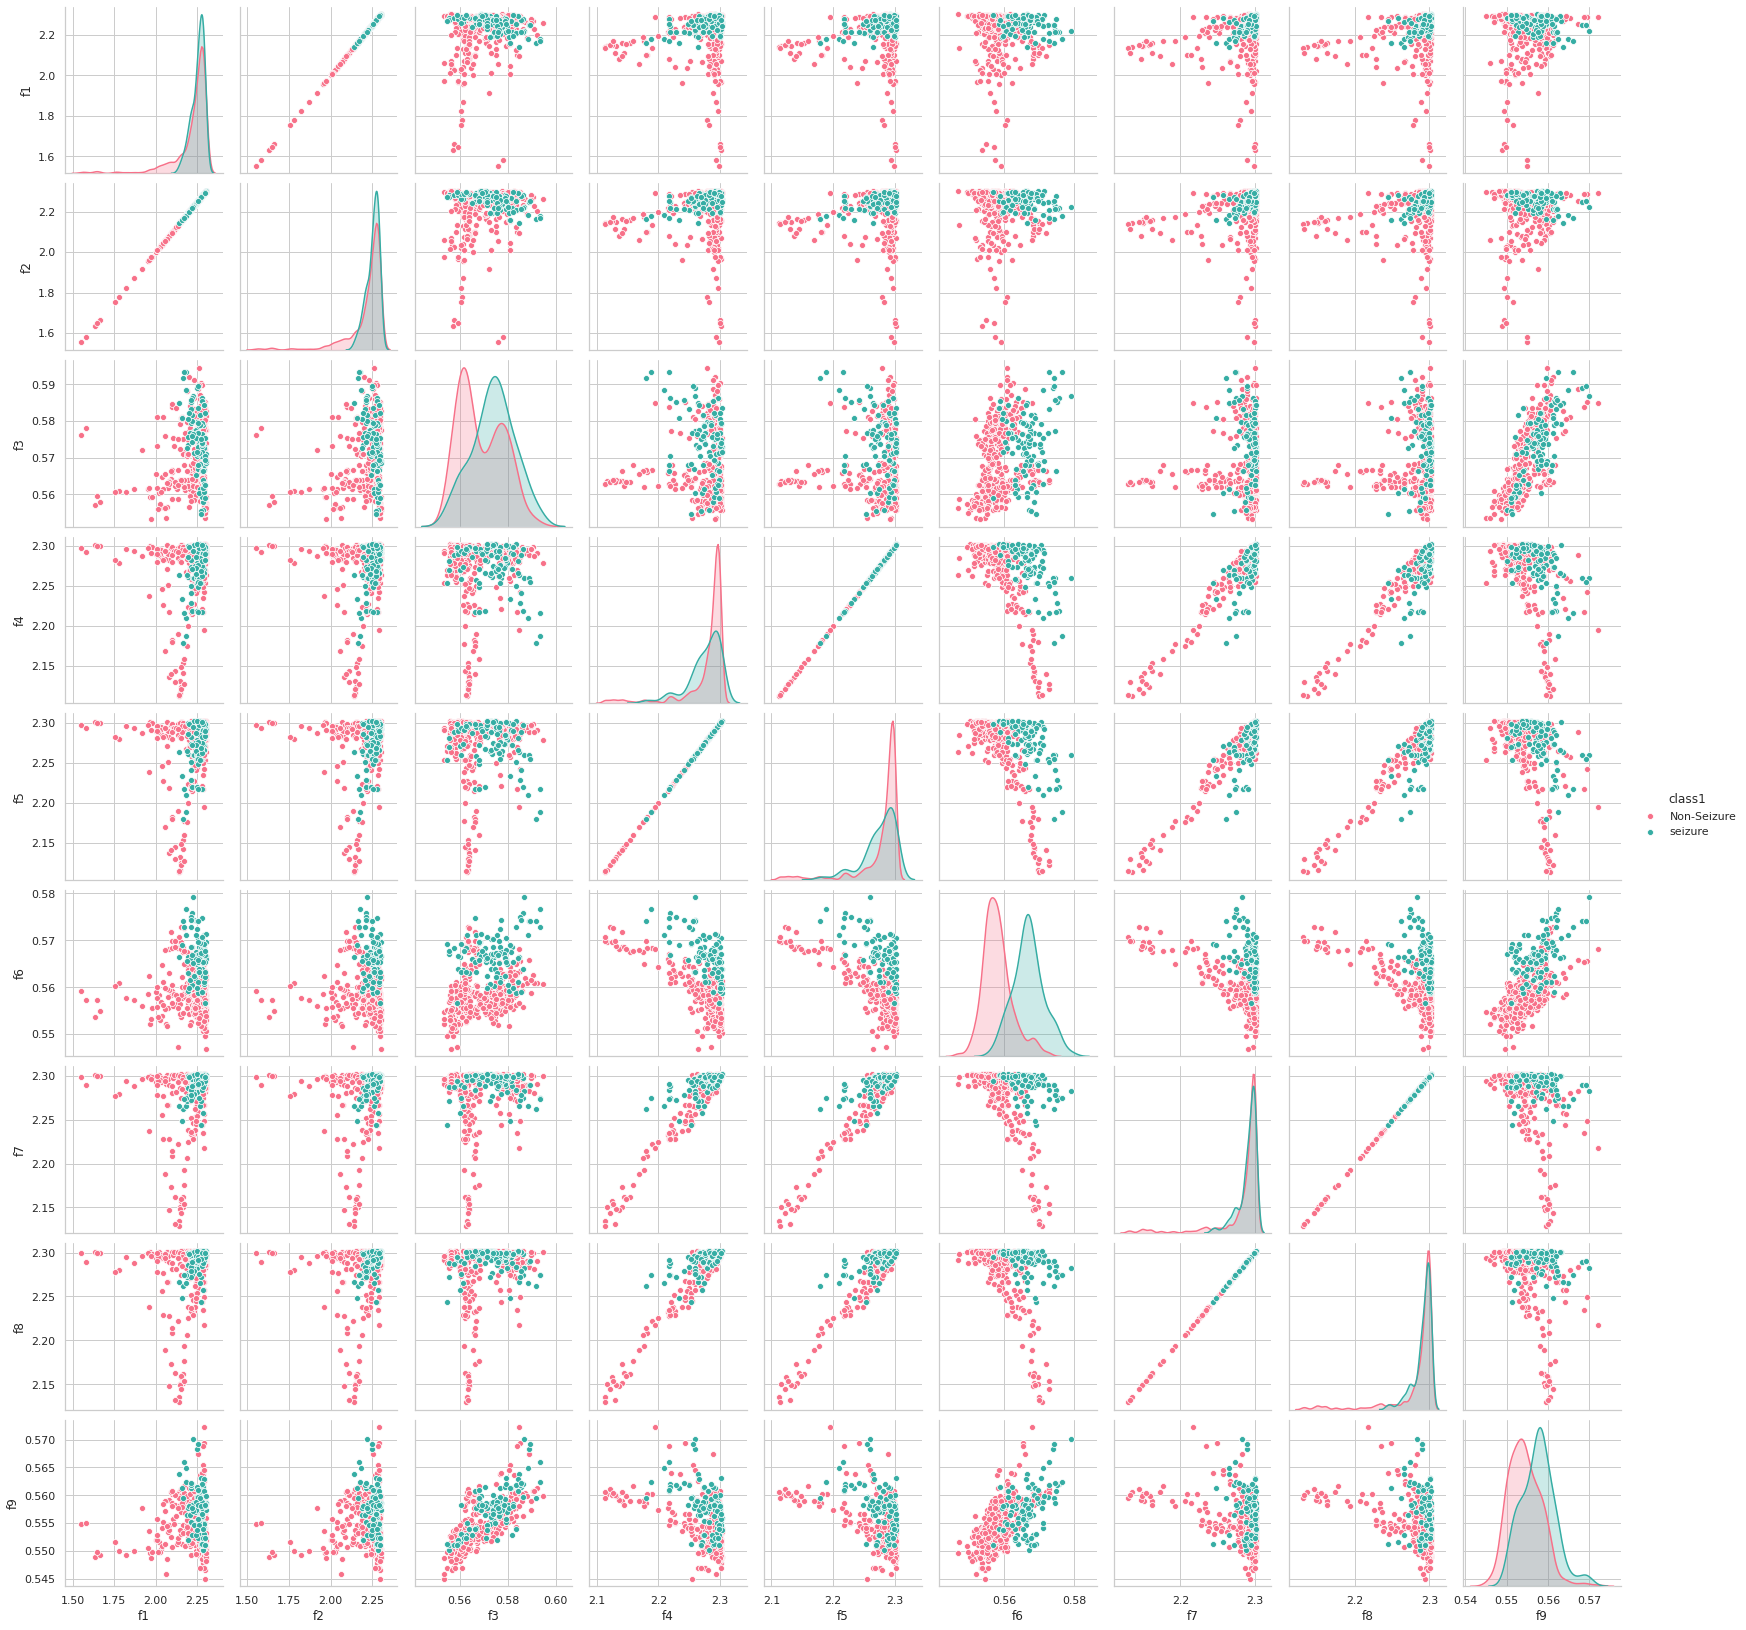

In [56]:
sbn.pairplot(visDat,hue='class1',palette="husl")
plt.show()

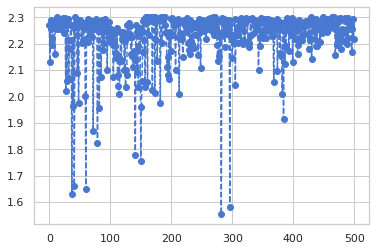

In [57]:
plt.plot(visDat['f1'],'--o')

#SPLITTING THE DATASET

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = TotalDataset[['f1','f2','f3','f4','f5','f6','f7','f8','f9']]
y = TotalDataset[['class1', 'class2']]
X = np.asarray(X)
y = np.asarray(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
print(X_train)

[[ 0.20254846  0.20254846 -0.50089188 ...  0.5805587   0.5805587
  -0.76289125]
 [ 0.59549106  0.59549106 -0.66536412 ...  0.52391253  0.52391253
  -0.33888089]
 [ 0.55068901  0.55068901 -1.27948672 ...  0.44237952  0.44237952
  -1.77850866]
 ...
 [ 0.20778802  0.20778802  0.77577989 ...  0.54852698  0.54852698
   0.62571728]
 [-0.09349988 -0.09349988  1.65481331 ... -0.33746922 -0.33746922
   1.62178459]
 [ 0.09600654  0.09600654 -0.73640026 ... -1.06602024 -1.06602024
  -0.16037997]]


#APPLYING ARTIFICIAL NUERAL NETWORK 
A trained neural network with ten hidden neurons and a single hidden layer is employed to identify the class of a given EEG signal from its features obtained. The ANN consists of linear activation functions and hyperbolic tangent function in its output and hidden layer respectively. The neural network training algorithm used is Levenberg-Marquardt backpropagation algorithm. The output layer consists of two nodes defining each class.

##TRAINING THE NEURAL NETWORK

In [62]:
net = prn.CreateNN([9,10,2])
net = prn.train_LM(X_train.T,y_train.T,net,verbose=True,k_max=100,E_stop=1e-5)
y_pred_temp = prn.NNOut(X_test.T,net)
y_pred_temp = y_pred_temp.T

Iteration:  0 		Error:  538.4311908241069 	scale factor:  3.0
Iteration:  1 		Error:  56.83883456950336 	scale factor:  0.3
Iteration:  2 		Error:  43.604743473605495 	scale factor:  0.3
Iteration:  3 		Error:  40.35092497839406 	scale factor:  0.3
Iteration:  4 		Error:  38.006574136917266 	scale factor:  0.3
Iteration:  5 		Error:  36.69623899432269 	scale factor:  0.03
Iteration:  6 		Error:  30.037959741407253 	scale factor:  0.03
Iteration:  7 		Error:  28.78147840501066 	scale factor:  0.03
Iteration:  8 		Error:  28.192826634000244 	scale factor:  0.03
Iteration:  9 		Error:  27.639132979981024 	scale factor:  0.03
Iteration:  10 		Error:  27.216028730203966 	scale factor:  0.03
Iteration:  11 		Error:  26.88075989439399 	scale factor:  0.03
Iteration:  12 		Error:  26.637455940764845 	scale factor:  0.03
Iteration:  13 		Error:  26.40500062074211 	scale factor:  0.03
Iteration:  14 		Error:  26.111512330250196 	scale factor:  0.03
Iteration:  15 		Error:  25.759389261488092 	sc

In [63]:
print(y_pred_temp)

[[-2.88020656e-02  1.02880207e+00]
 [ 5.96087342e-03  9.94039127e-01]
 [-4.52083375e-03  1.00452083e+00]
 [-5.83882669e-02  1.05838827e+00]
 [-4.10430160e-02  1.04104302e+00]
 [ 9.06546650e-03  9.90934534e-01]
 [-1.61464084e-02  1.01614641e+00]
 [-3.03146818e-02  1.03031468e+00]
 [-6.17790942e-03  1.00617791e+00]
 [ 9.91300079e-02  9.00869992e-01]
 [-6.59682106e-03  1.00659682e+00]
 [ 3.63456796e-02  9.63654320e-01]
 [-7.20381666e-02  1.07203817e+00]
 [ 5.24166264e-02  9.47583374e-01]
 [ 8.28917643e-05  9.99917108e-01]
 [ 1.04058941e-01  8.95941059e-01]
 [ 1.11775775e+00 -1.17757749e-01]
 [ 9.48796830e-03  9.90512032e-01]
 [ 3.11582671e-01  6.88417329e-01]
 [ 1.02263641e+00 -2.26364065e-02]
 [ 1.25844983e+00 -2.58449828e-01]
 [ 9.65215022e-01  3.47849777e-02]
 [-5.98664767e-02  1.05986648e+00]
 [ 3.19985696e-01  6.80014304e-01]
 [-4.84397030e-02  1.04843970e+00]
 [ 1.09376626e+00 -9.37662570e-02]
 [ 1.09025746e+00 -9.02574624e-02]
 [ 1.82441680e-02  9.81755832e-01]
 [ 2.76557988e-02  9

In [0]:
Y_pred = np.zeros((100,1))
for i in range(100):
  Y_pred[i] = np.argmax(y_pred_temp[i,:])

Y_test = np.zeros((100,1))
for i in range(100):
  Y_test[i] = np.argmax(y_test[i,:])

In [65]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]]


##CREATE CONFUSION MATRIX

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_ann = confusion_matrix(Y_test, Y_pred)
print(cm_ann)
accuracy_score(Y_test, Y_pred)

[[18  6]
 [ 0 76]]


0.94

##VISUALISING ROC CURVE


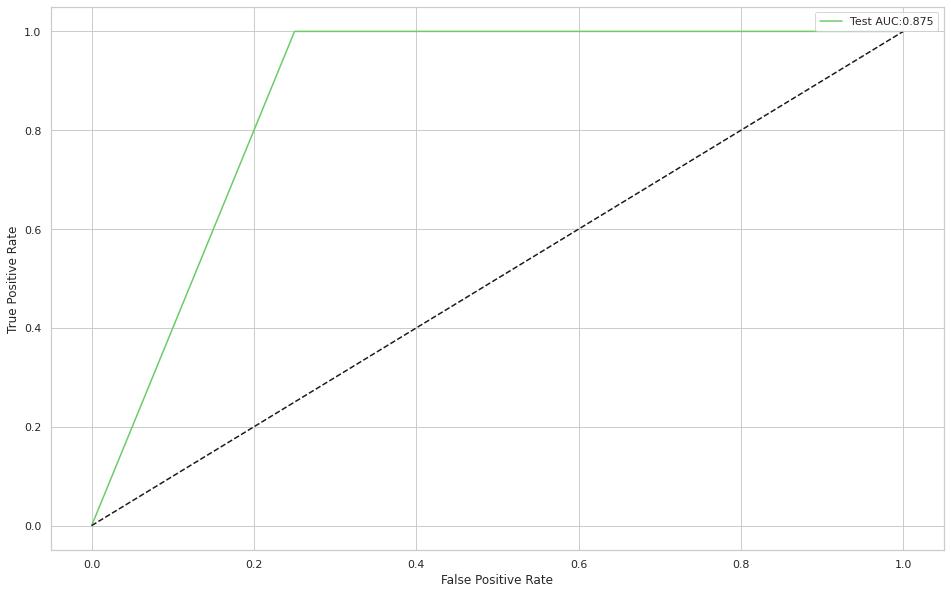

In [70]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_pred)
auc_test = roc_auc_score(Y_test, Y_pred)

plt.figure(figsize=(16,10))
#plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
#plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#APPLYING SVM CLASSIFICATION

##TRAINING THE NEURAL NETWORK

In [72]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train[:,0])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [73]:
Y_train_pred_svm = classifier.predict(X_train)
Y_pred_svm = classifier.predict(X_test)
Y_test_svm = y_test[:, 0]
print(np.concatenate((Y_pred_svm.reshape(len(Y_pred_svm),1), Y_test_svm.reshape(len(Y_test_svm),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]]


##CREATE CONFUSION MATRIX

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(Y_pred_svm, Y_test_svm)
print(cm_svm)
accuracy_score(Y_test_svm, Y_pred_svm)

[[76  7]
 [ 0 17]]


0.93

##VISUALISING ROC CURVE


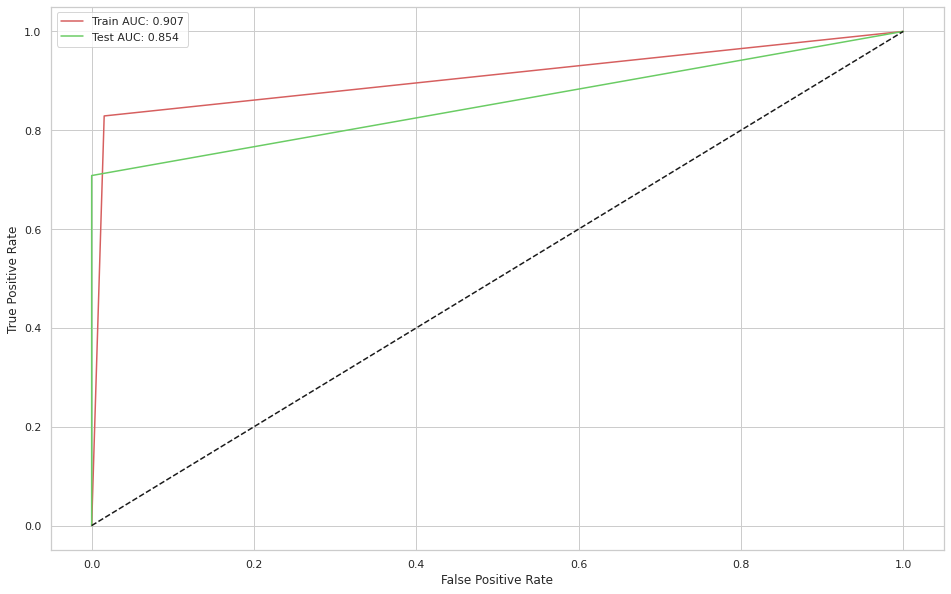

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_train_svm, tpr_train_svm, thresholds_train = roc_curve(y_train[:,0], Y_train_pred_svm)
auc_train_svm = roc_auc_score(y_train[:,0], Y_train_pred_svm)

fpr_test_svm, tpr_test_svm, thresholds_test = roc_curve(Y_test_svm, Y_pred_svm)
auc_test_svm = roc_auc_score(Y_test_svm, Y_pred_svm)

plt.figure(figsize=(16,10))
plt.plot(fpr_train_svm, tpr_train_svm, 'r-',label ='Train AUC: %.3f'%auc_train_svm)
#plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test_svm, tpr_test_svm, 'g-',label ='Test AUC: %.3f'%auc_test_svm)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# APPLY ANN USING TENSORFLOW
Apply ANN using Tensorflow and ADAM backpropagation Algorithm with sigmoid activation function in the output layer

##TRAINING THE NEURAL NETWORK

In [76]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train[:,0], batch_size = 32, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7652 - accuracy: 0.2900
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7076 - accuracy: 0.4525
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6325
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6153 - accuracy: 0.7100
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7500
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.7875
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5243 - accuracy: 0.8050
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.8100
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.8150
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.8175
Epoch 11/

In [0]:
Y_pred_tf = ann.predict(X_test)
Y_pred_tf = (Y_pred_tf > 0.5)
Y_train_pred_tf = ann.predict(X_train)
Y_train_pred_tf = (Y_train_pred_tf > 0.5)

##CREATE CONFUSION MATRIX

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_tf = confusion_matrix(Y_pred_tf, Y_test_svm)
print(cm_tf)
accuracy_score(Y_pred_tf, Y_test_svm)

[[76  8]
 [ 0 16]]


0.92

##VISUALISING ROC CURVE


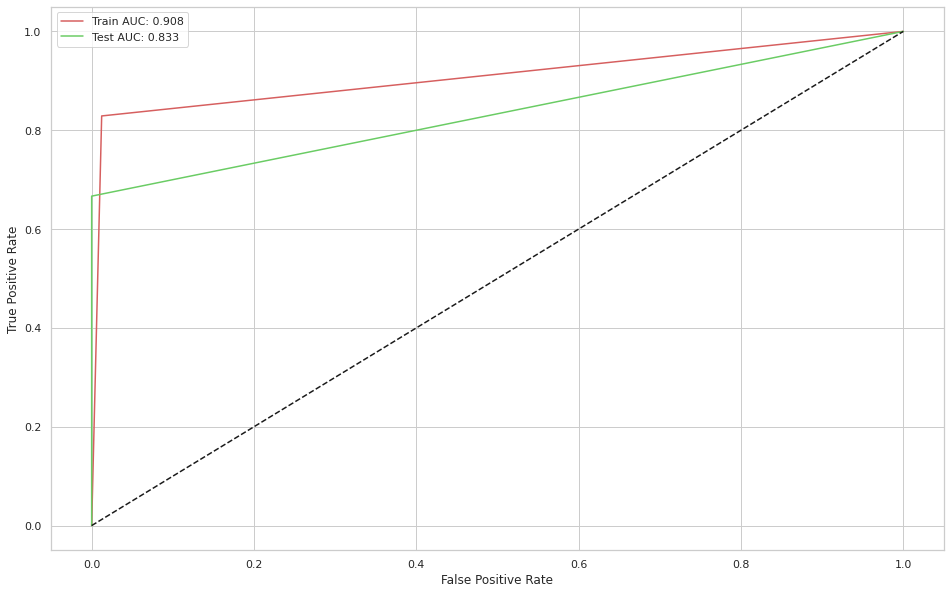

<function print>

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_train_tf, tpr_train_tf, thresholds_train_tf = roc_curve(y_train[:,0], Y_train_pred_tf)
auc_train_tf = roc_auc_score(y_train[:,0], Y_train_pred_tf)

fpr_test_tf, tpr_test_tf, thresholds_test_tf = roc_curve(Y_test_svm, Y_pred_tf)
auc_test_tf = roc_auc_score(Y_test_svm, Y_pred_tf)

plt.figure(figsize=(16,10))
plt.plot(fpr_train_tf, tpr_train_tf, 'r-',label ='Train AUC: %.3f'%auc_train_tf)
plt.plot(fpr_test_tf, tpr_test_tf, 'g-',label ='Test AUC: %.3f'%auc_test_tf)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print